In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
# from useful_func import *
import os
import datetime

c:\miniconda\envs\molonari\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importation des séismes

In [2]:
fs = 40

df = pd.read_csv('info_events.csv', index_col=0)
df['Picked arrival'] = pd.to_datetime(df['Picked arrival'])
df['file_start'] = pd.to_datetime(df['file_start'])
diff = (df['Picked arrival']- df['file_start'])
df['diff'] = diff.dt.total_seconds()


signals = []
for i in range(1, len(df)+1):
    file = df['file'][i]
    y = np.fromfile(file, dtype=np.int32)
    signals.append(y)

df['signal'] = signals
df['delta_event_end_signal'] = df['signal'].apply(len)/fs - df['diff']
del signals, y, diff
df = df.sort_values(by='Picked arrival')

In [3]:
df.head()

,Picked arrival,Tag,Arrival type,IRIS Event ID,file,file_start,diff,signal,delta_event_end_signal
Event number,,,,,,,,,
134,2018-09-15 08:20:00,*,body,10948197,data\DonneesB23\2018-09\2018-09-14\2018-09-14T...,2018-09-14 15:01:13,62327.0,"[-2061104, -2169408, -2271664, -2357456, -2444...",25317.8
135,2018-09-15 16:38:00,*,body,10948285,data\DonneesB23\2018-09\2018-09-15\2018-09-15T...,2018-09-15 15:22:36,4524.0,"[-1535472, -1461440, -1376512, -1305712, -1239...",112247.2
21,2018-09-16 21:18:05,***,body,10948555,data\DonneesB23\2018-09\2018-09-15\2018-09-15T...,2018-09-15 15:22:36,107729.0,"[-1535472, -1461440, -1376512, -1305712, -1239...",9042.2
136,2018-09-18 07:50:00,*,body,10953395,data\DonneesB23\2018-09\2018-09-17\2018-09-17T...,2018-09-17 09:30:10,80390.0,"[1210240, 1286816, 1360448, 1409136, 1469184, ...",10256.4
137,2018-09-18 12:07:30,*,body,10949274,data\DonneesB23\2018-09\2018-09-18\2018-09-18T...,2018-09-18 10:41:34,5156.0,"[1132528, 1085440, 1027376, 961936, 910784, 85...",35647.2


In [4]:
df['Tag'].unique()

array(['*', '***', '**', 'REQ', 'DET', 'S1', 'S2', 'S3'], dtype=object)

In [5]:
all_files = []
for dossier_actuel, sous_dossiers, fichiers in os.walk('data\DonneesB23'):
    if "_MACOSX" not in dossier_actuel:
        for fichier in fichiers:
            if '.DS_Store' not in fichier:
                path = os.path.join(dossier_actuel, fichier)
                y = np.fromfile(path, dtype=np.int32)
                if len(y)/fs > 2*60*60 :
                    all_files.append(path)
del y
noisy_files = []
known_files = list(df['file'].unique())
for file in all_files :
    if file not in known_files :
        noisy_files.append(file)

In [6]:
def get_negatives2(noisy_files, duree, nb_0, fs=40):
    signals = [np.fromfile(file, dtype=np.int32) for file in noisy_files]

    X_0 = []
    i = 0
    while len(X_0) < nb_0 :

        T = int(len(signals[i])/fs)
        t = np.random.randint(T - duree)
        y = signals[i][t*fs : t*fs + duree*fs]
        X_0.append(y)
            
        i = (i + 1) % len(signals)
    return X_0

In [64]:
demi_duree = 60*60

n = 100

mask = mask = ((df['Tag'] == '*') | (df['Tag'] == 'S1')).values

df_us = df[mask]
seismes = df_us['signal']

print(n, 'positives')

nb_0 = int(n*2)

bruit = get_negatives2(noisy_files, 2*demi_duree, nb_0)

# print(nb_0, 'negatives')
# print(len(X_0), len(signal_tronque))
# y_0 = np.zeros(len(X_0))
# y_1 = np.ones(len(signal_tronque))

# X = np.concatenate((X_0, signal_tronque))
# y = np.concatenate((y_0, y_1))

# del X_0, y_0, y_1, signal_tronque

# X = np.array(list(signal.decimate(X, 2)))
# print(X.shape)

ValueError: high <= 0

In [65]:
bruit

[array([ -674400,  -670784,  -664080, ..., -1858960, -1877008, -1904432]),
 array([ 283888,  176672,   74864, ..., 2347840, 2332720, 2308112]),
 array([  565296,   607264,   622624, ..., -1049552, -1166832, -1287456]),
 array([  415808,   398544,   385248, ..., -1470832, -1488880, -1494672]),
 array([  388192,   405360,   439280, ..., -1410208, -1410304, -1364592]),
 array([-1170896, -1127040, -1099760, ..., -1356896, -1402400, -1437232]),
 array([3237808, 3230448, 3201728, ...,  321888,  277216,  234816]),
 array([-645424, -626272, -604704, ...,  577360,  613824,  671600]),
 array([-421936, -432144, -415840, ...,  470912,  492912,  498272]),
 array([-493824, -425808, -357584, ...,  213936,  210144,  223312]),
 array([ -933712, -1021392, -1106992, ...,   297680,   270768,   252864]),
 array([1949392, 2035296, 2136512, ..., -919536, -971440, -991088]),
 array([-1290544, -1186208, -1113824, ...,  -255904,  -350352,  -430720]),
 array([-2599472, -2628848, -2667008, ...,   -70352,    -3120

In [8]:
df_us.describe()

,Picked arrival,IRIS Event ID,file_start,diff,delta_event_end_signal
count,80,8.000000e+01,80,80.000000,80.000000
mean,2019-03-01 20:03:08.125000192,1.101386e+07,2019-02-28 08:47:01.937499904,126966.187500,120593.692500
min,2018-09-15 08:20:00,1.094820e+07,2018-09-14 15:01:13,2904.000000,2502.800000
25%,2018-12-12 20:49:45,1.098396e+07,2018-12-10 01:01:49.500000,43934.000000,35014.150000
50%,2019-03-13 10:55:30,1.101420e+07,2019-03-10 20:57:31,88478.500000,84869.800000
75%,2019-06-03 09:12:15,1.104409e+07,2019-05-31 08:34:06.750000128,187097.750000,134092.750000
max,2019-08-12 10:45:00,1.109611e+07,2019-08-11 22:26:30,588731.000000,615326.600000
std,NaN,4.308123e+04,NaN,117682.119961,128630.344395


seismes est composé de 80 séismes * et bruit a 200 moments de bruit.

## Analyse simple

In [9]:
df_us = df_us.reset_index(drop=True)

df_us.loc[0, 'signal']

array([-2061104, -2169408, -2271664, ..., -1995824, -2078288, -2150016])

In [79]:
def analyse(ligne, plot):
    y = np.convolve(ligne, np.ones(20)/len(ligne), mode = 'valid')
    if plot == True:
        plt.plot(times[: len(y)], y)
        plt.show()
    else:
        return y

In [83]:
def moyenne(S):
    y = []
    for i in range(11, 24):
        y.append(analyse(S[i], plot = False))
    Y = np.mean(y, axis = 0)
    plt.plot(times[:len(Y)], Y)
    plt.title('Exemple')
    plt.xlabel('Temps (s)')
    plt.ylabel('Puissance (dB/Hz)')
    plt.legend()

In [72]:
def puissance_log(y, plot):
    frequencies, times, Sxx = signal.spectrogram(y, fs, nperseg=9000, noverlap=8000)
    if plot == False:
        return (Sxx, frequencies, times)
    else:
        plt.figure(figsize=(20,8))
        plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
        plt.title('Spectrogramme')
        plt.xlabel('Temps (s)')
        plt.ylabel('Fréquence (Hz)')
        plt.yscale('log')
        plt.ylim([.05, 0.1])
        plt.colorbar(label='Puissance (dB/Hz)')

In [13]:
def pic(df, i):
    x = puissance_log(df.loc[i, 'signal'], False)[0]
    moyenne(x)

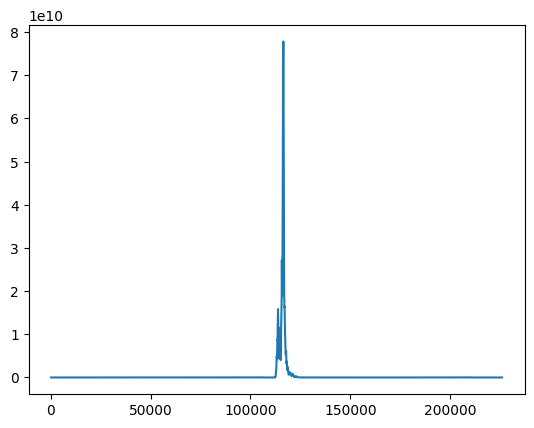

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


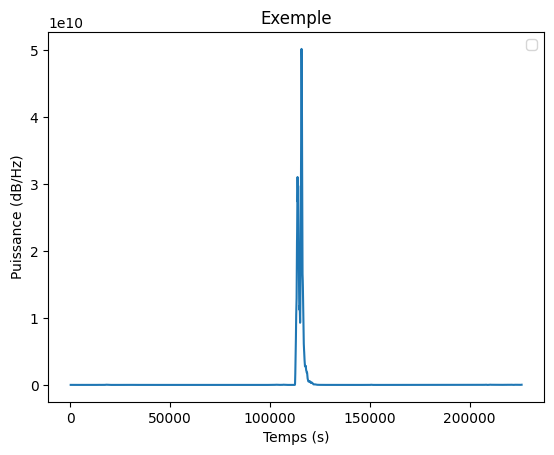

In [84]:
s = puissance_log(df_us.loc[5, 'signal'], False)[0]
analyse(s[15], True)
moyenne(s)

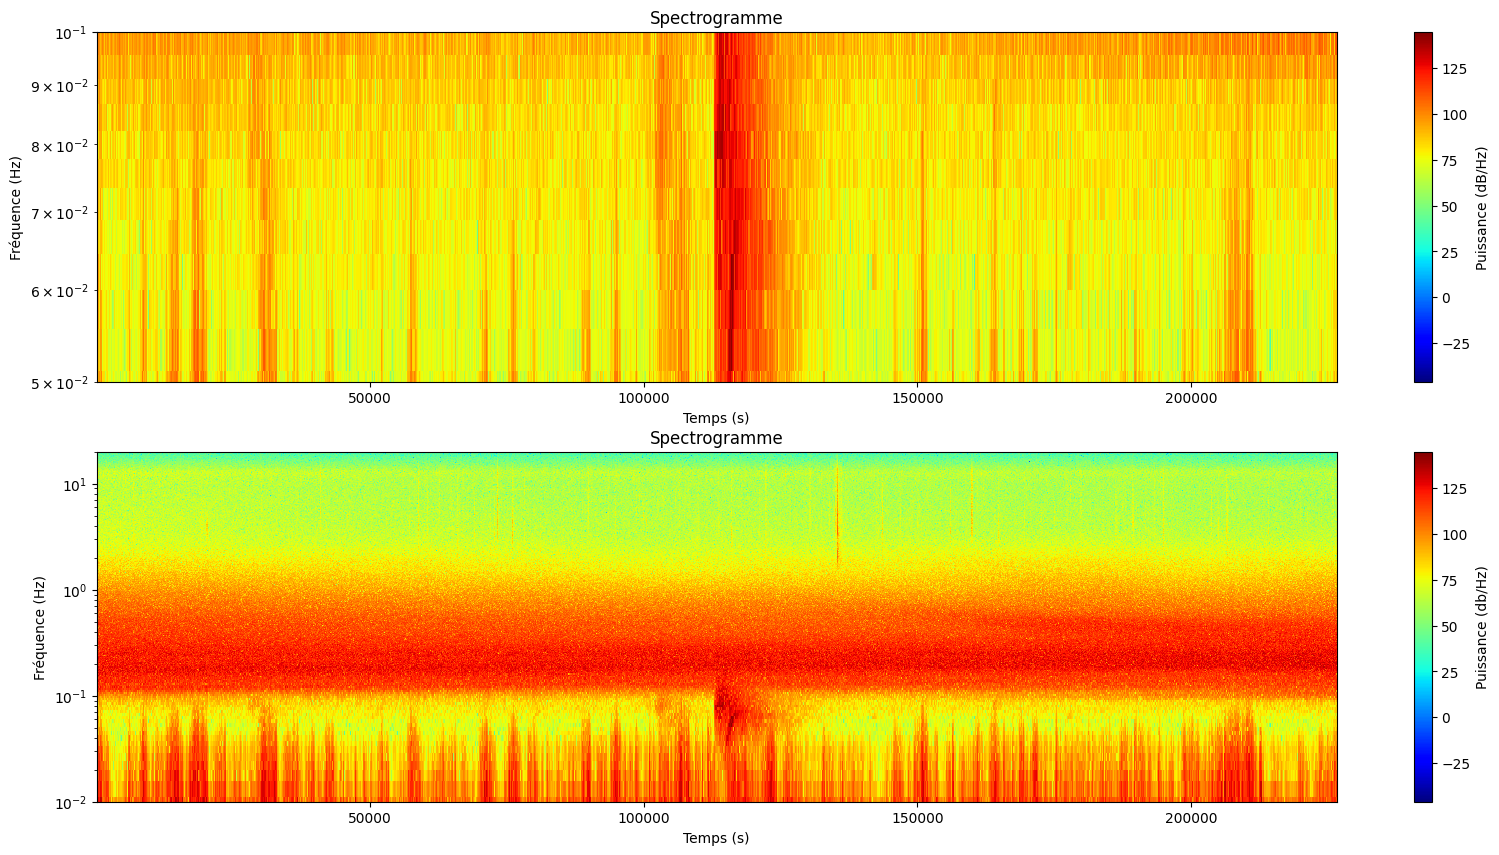

9058


In [43]:
y = df_us.loc[5, 'signal']
frequencies, times, Sxx = signal.spectrogram(y, fs, nperseg=9000, noverlap=8000)
# epoch = datetime.datetime.utcfromtimestamp(0)
# # Transformer les valeurs en objets datetime
# heures = [epoch + datetime.timedelta(seconds=valeur) for valeur in times]
# heures_formatees = [heure.strftime('%H:%M') for heure in heures]

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.title('Spectrogramme')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.yscale('log')
# plt.ylim([.01, 20])
plt.ylim([.05, 0.1])
plt.colorbar(label='Puissance (dB/Hz)')

plt.subplot(2,1,2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.title('Spectrogramme')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.yscale('log')
plt.ylim([.01, 20])
plt.colorbar(label = 'Puissance (db/Hz)')

# plt.subplot(3,1,3)
# plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
# plt.title('Spectrogramme')
# plt.xlabel('Temps (s)')
# plt.ylabel('Fréquence (Hz)')
# plt.yscale('log')
# plt.ylim([1, 20])
# # plt.ylim([.05, 0.1])
# plt.colorbar(label='Puissance (dB/Hz)')
# axes = plt.gca()
# axes.xaxis.set_ticks([ '00:20', '00:40', '01:00', '01:20'])
# file_path = os.path.join(output_folder, f'spectrogramme{event_n}.png')
# plt.savefig(file_path)
# Effacement du contenu du graphique pour le prochain

# Sauvegarder le contenu du graphique sans les axes, le fond, etc.
# plt.savefig('mon_graphique_contenu.png', bbox_inches='tight', transparent=True)

# Afficher le graphique
plt.show()
print(len(times))

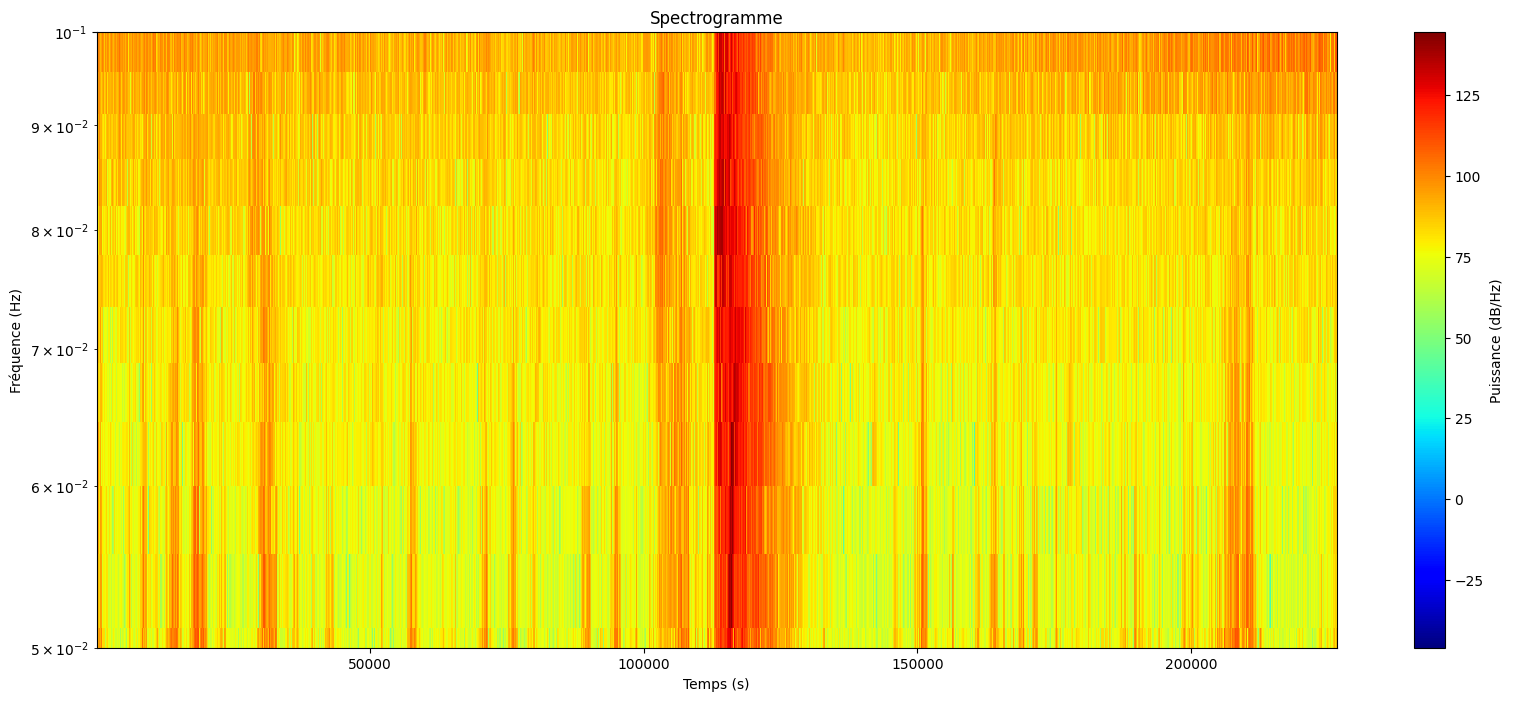

In [14]:
puissance_log(df_us.loc[5, 'signal'], True)

In [44]:
pic(df_us, 5)

TypeError: 'list' object is not callable

In [ ]:

from scipy.signal import find_peaks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

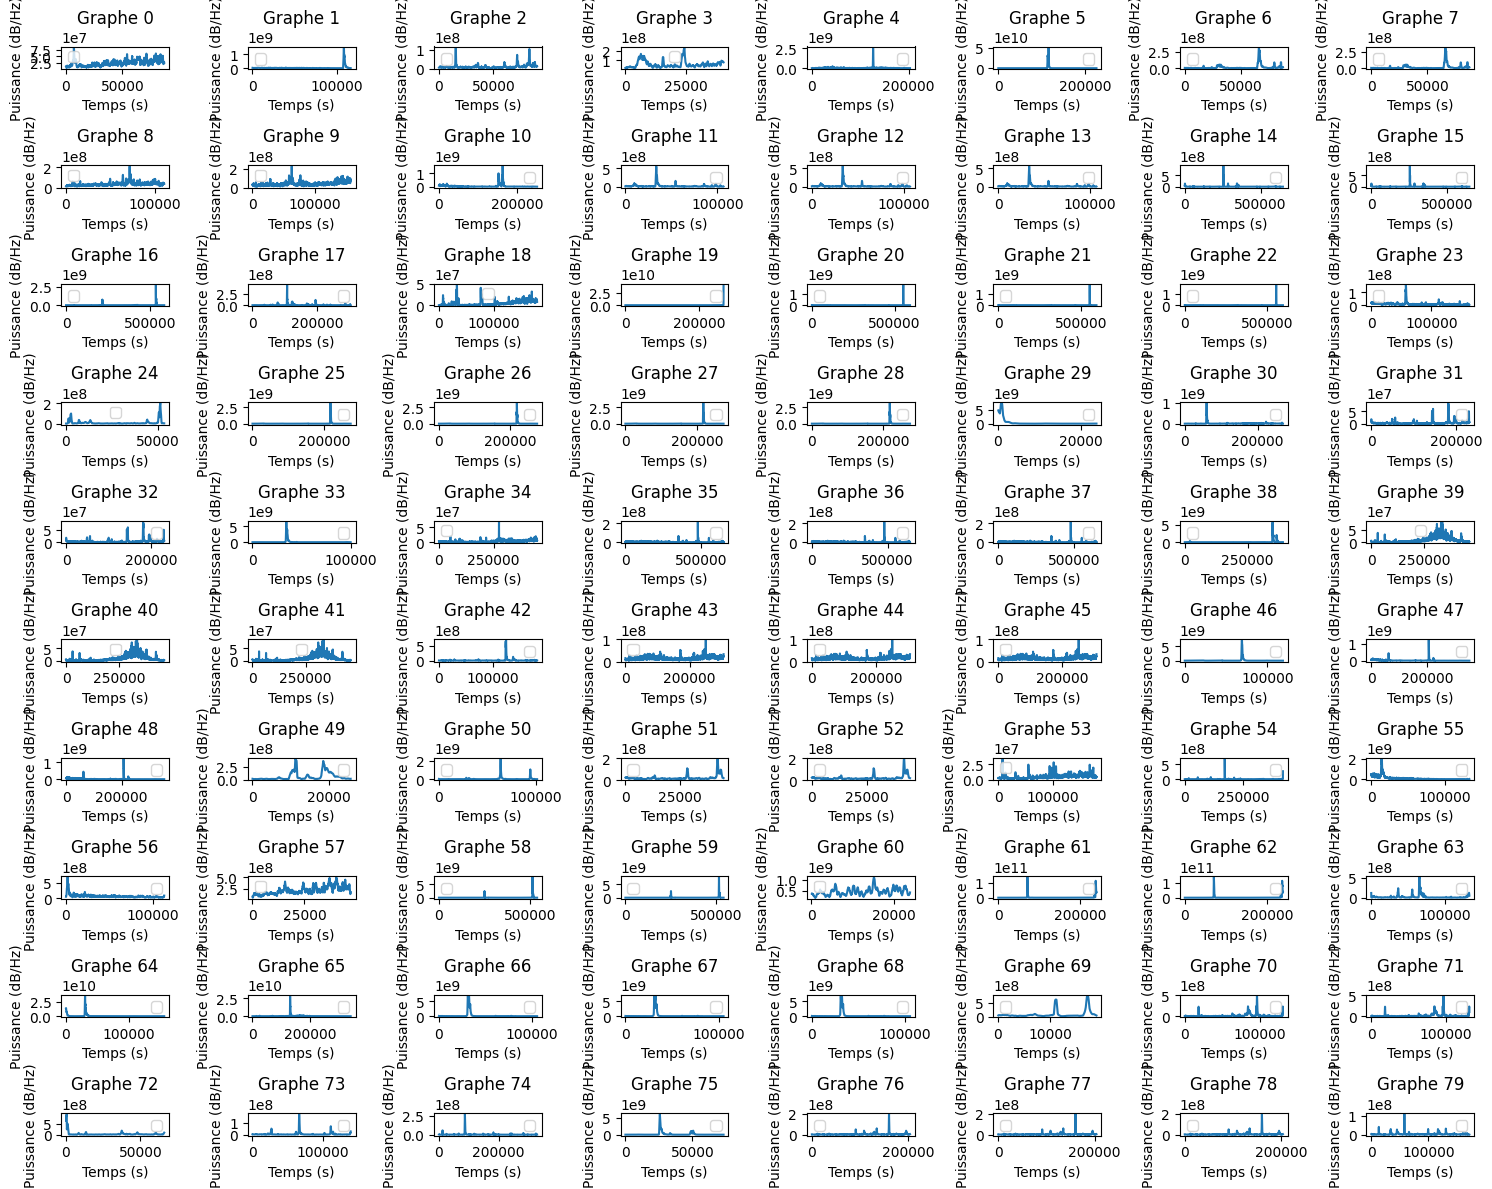

In [86]:
nb_graphes = 10

# Création des 20 graphes
fig, axs = plt.subplots(10,8 , figsize=(15, 12))  # 5 lignes, 4 colonnes pour un total de 20 graphes
axs = axs.ravel()  # Convertir la matrice d'axes en un tableau 1D

for i in range(len(df_us)):
    x = puissance_log(df_us.loc[i, 'signal'], False)[0]
    t = puissance_log(df_us.loc[i, 'signal'], False)[2]
    y = []
    for j in range(11, 24):
        y.append(analyse(x[j], plot = False))
    Y = np.mean(y, axis = 0)
    axs[i].plot(t[:len(Y)], Y)  # Tracer le graphe de dispersion
    axs[i].set_xlabel('Temps (s)')
    axs[i].set_ylabel('Puissance (dB/Hz)')
    axs[i].set_title(f"Graphe {i}")  # Titre du graphe
    axs[i].legend()

# Ajustements supplémentaires si nécessaire
plt.tight_layout()  # Ajustement automatique des sous-graphiques pour éviter le chevauchement des titres et des étiquettes

# Afficher les graphes
plt.show()


In [34]:
def ecart(Y):
    return np.std(Y)

In [152]:
def sta_lta(y, fs=40, sta=7, lta=400) :
    sta = int(sta * fs)
    lta = int(lta * fs)
    sta = signal.convolve(y**2, np.ones(sta)/sta, 'same')
    lta = signal.convolve(y**2, np.ones(lta)/lta, 'same')
    return sta / lta

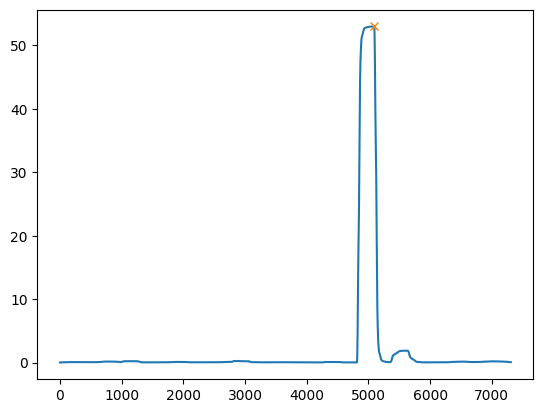

In [221]:
moyenne = []
i = np.random.randint(len(df_us))
x = puissance_log(df_us.loc[i, 'signal'], False)[0]
times = puissance_log(df_us.loc[i, 'signal'], False)[2]
y = []
for j in range(11, 24):
    y.append(analyse(x[j], plot = False))
Y = np.mean(y, axis = 0)
z = sta_lta(Y)

from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
peaks, _ = find_peaks(z, height=20)

plt.plot( z)
plt.plot(peaks, z[peaks], "x")
plt.show()

261


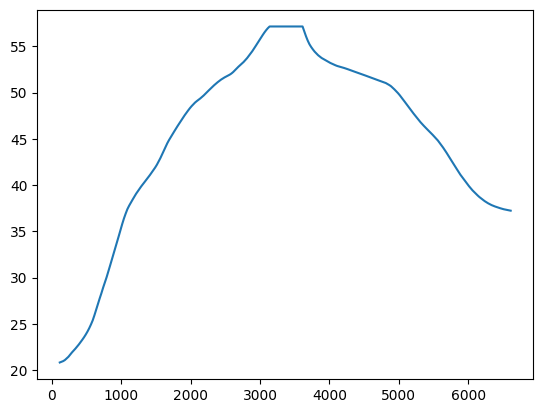

In [200]:
moyenne = []
i = np.random.randint(len(bruit))
x = puissance_log(bruit[i], False)[0]
times = puissance_log(bruit[i], False)[2]
y = []
for j in range(11, 24):
    y.append(analyse(x[j], plot = False))
Y = np.mean(y, axis = 0)
z = sta_lta(Y)
print(len(z))
plt.plot(times[:len(z)], z)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280
261 280


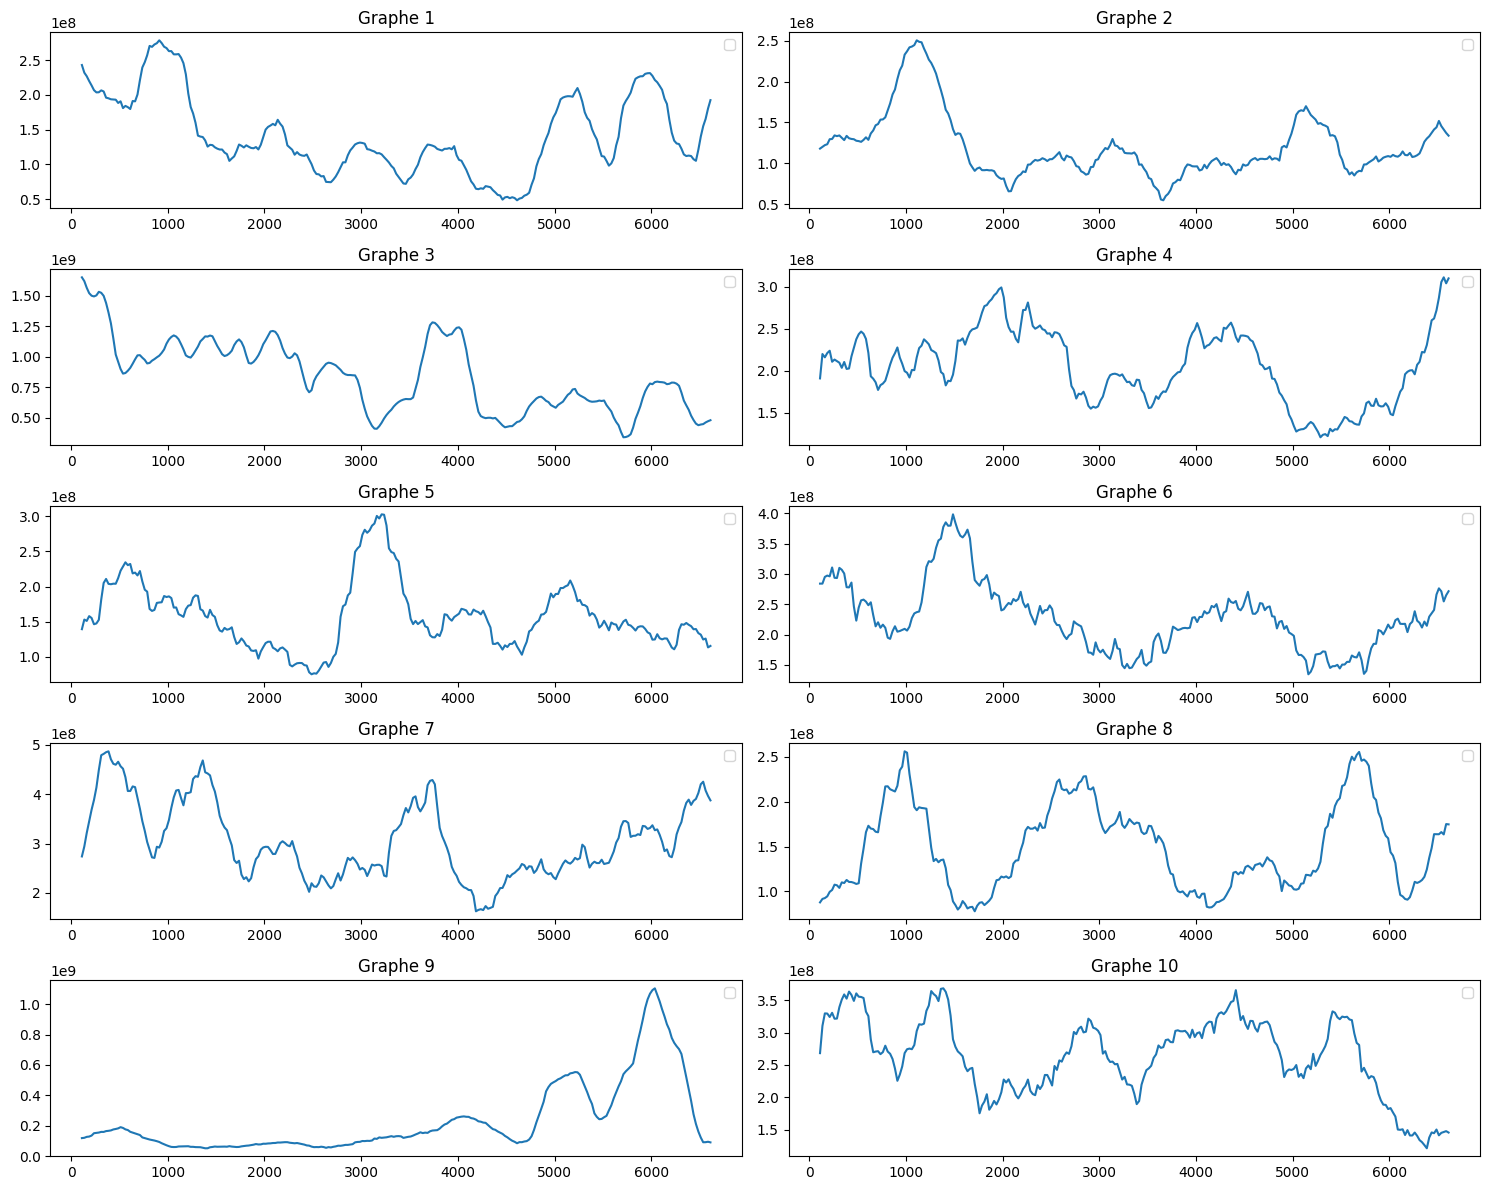

In [66]:
nb_graphes = 10

# Création des 20 graphes
fig, axs = plt.subplots(5,2 , figsize=(15, 12))  # 5 lignes, 4 colonnes pour un total de 20 graphes
axs = axs.ravel()  # Convertir la matrice d'axes en un tableau 1D

for i in range(nb_graphes):
    x = puissance_log(bruit[i], False)[0]
    y = []
    for j in range(11, 24):
        y.append(analyse(x[j], plot = False))
    Y = np.mean(y, axis = 0)
    axs[i].plot(times[:len(Y)], Y)  # Tracer le graphe de dispersion
    axs[i].set_title(f"Graphe {i+1}")  # Titre du graphe
    axs[i].legend()

# Ajustements supplémentaires si nécessaire
plt.tight_layout()  # Ajustement automatique des sous-graphiques pour éviter le chevauchement des titres et des étiquettes

# Afficher les graphes
plt.show()

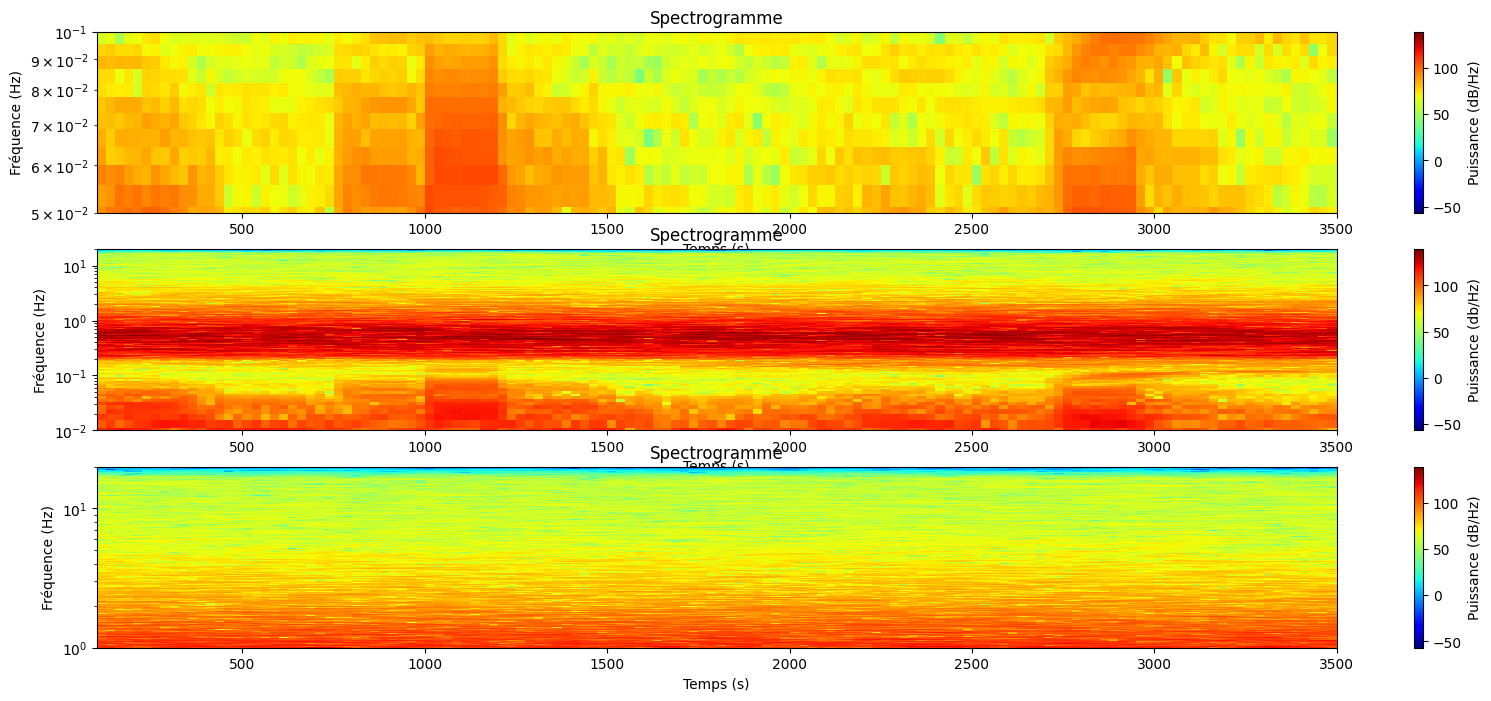

136


In [ ]:
frequencies, times, Sxx = signal.spectrogram(X[400], fs, nperseg=9000, noverlap=8000)
# epoch = datetime.datetime.utcfromtimestamp(0)
# # Transformer les valeurs en objets datetime
# heures = [epoch + datetime.timedelta(seconds=valeur) for valeur in times]
# heures_formatees = [heure.strftime('%H:%M') for heure in heures]

plt.figure(figsize=(20,8))

plt.subplot(3,1,1)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.title('Spectrogramme')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.yscale('log')
# plt.ylim([.01, 20])
plt.ylim([.05, 0.1])
plt.colorbar(label='Puissance (dB/Hz)')

plt.subplot(3,1,2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.title('Spectrogramme')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.yscale('log')
plt.ylim([.01, 20])
plt.colorbar(label = 'Puissance (db/Hz)')

plt.subplot(3,1,3)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.title('Spectrogramme')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.yscale('log')
plt.ylim([1, 20])
# plt.ylim([.05, 0.1])
plt.colorbar(label='Puissance (dB/Hz)')
# axes = plt.gca()
# axes.xaxis.set_ticks([ '00:20', '00:40', '01:00', '01:20'])
# file_path = os.path.join(output_folder, f'spectrogramme{event_n}.png')
# plt.savefig(file_path)
# Effacement du contenu du graphique pour le prochain

# Sauvegarder le contenu du graphique sans les axes, le fond, etc.
# plt.savefig('mon_graphique_contenu.png', bbox_inches='tight', transparent=True)

# Afficher le graphique
plt.show()
print(len(times))